# import libreries

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset

In [2]:

train_dataset = pd.read_csv('/content/train.csv')

# Split features (X) and target (y) for training


In [3]:
X_train = train_dataset.iloc[:, 1:5]
y_train = train_dataset['Species']

# Load the test dataset


In [5]:
test_dataset = pd.read_csv('/content/test.csv')

# Split features (X) and target (y) for testing


In [6]:
X_test = test_dataset.iloc[:, 1:5]
y_test = test_dataset['Species']

# Define the KNN Classifier class

In [7]:

class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, point1, point2):
        return ((point1 - point2) ** 2).sum() ** 0.5

    def predict_instance(self, test_instance):
        distances = [(i, self.euclidean_distance(test_instance, self.X_train.iloc[i])) for i in range(len(self.X_train))]

        distances.sort(key=lambda x: x[1])
        neighbors_indices = [index for index, _ in distances[:self.k]]

        labels = self.y_train.iloc[neighbors_indices]

        return labels.mode().iloc[0]

    def predict(self, X_test):
        return [self.predict_instance(X_test.iloc[i]) for i in range(len(X_test))]


# Set the value of k


In [8]:
k_value = 3

# Initialize the KNN model


In [9]:
knn_model = KNNClassifier(k=k_value)


# Train the KNN model


In [10]:
knn_model.fit(X_train, y_train)

# Make predictions on the training set


In [11]:
train_predictions = knn_model.predict(X_train)

# Calculate and print training accuracy


In [12]:
accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {accuracy}')

Training Accuracy: 0.9666666666666667


# Scatter plot for Sepal Length vs. Sepal Width (Training Data)


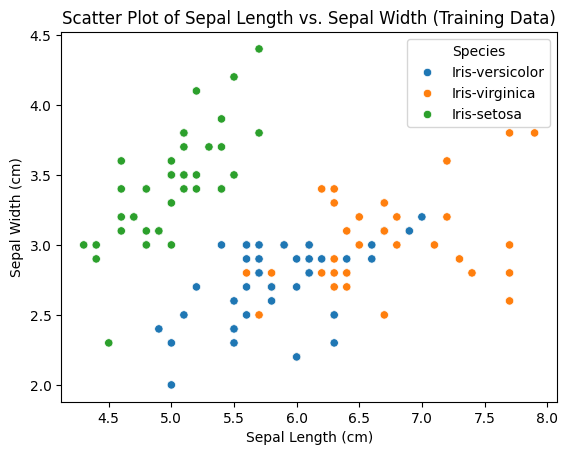

In [13]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=train_dataset)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width (Training Data)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Make predictions on the test set


In [14]:
predictions = knn_model.predict(X_test)

# Calculate and print test accuracy


In [15]:
accuracy_test = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy_test}')

Test Accuracy: 0.9333333333333333


# Scatter plot for Sepal Length vs. Sepal Width (Test Data)


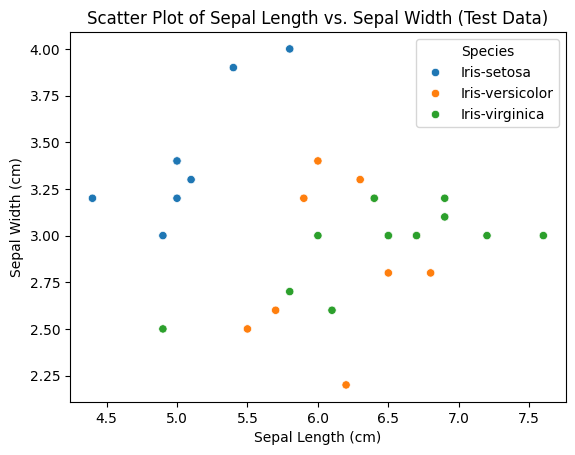

In [16]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=test_dataset)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width (Test Data)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Save the predictions to a CSV file


In [17]:
results_df = pd.DataFrame({'Species': predictions})
results_df.to_csv('/content/result.csv', index=False)